
# Machine Learning with Python

Welcome to the **Machine Learning** course! This course is designed to give you hands-on experience with the foundational concepts and advanced techniques in machine learning. You will explore:

1. **Supervised Learning**
    - Regression algorithms
    - Classification algorithms
2. **Unsupervised Learning**
    - Clustering algorithms
    - Dimensionality reduction
3. **Fairness and Interpretability**
    - Interpretable methods
    - Bias evaluation
    
Throughout the course, you'll engage in projects to solidify your understanding and gain practical skills in implementing machine learning algorithms.  

Instructor: Dr. Adrien Dorise  
Contact: adrien.dorise@hotmail.com  

---


## Part2.2: Unsupervised learning - Dimensionality reduction on the MNIST dataset
In this project, you will use dimensionality reduction to get a better representation of the MNIST dataset, and analyse its impact on classification. The taks will include:  

1. **Import and Understand a Dataset**: Learn how to load, preprocess, and explore a dataset to prepare it for training.
2. **Perform dimensionality reduction on a dataset**: Learn to transform a high-dimensional dataset into a 2D dataset for better visualisation.
3. **Train a classification model**: Select and train a classification model using scikit-learn.
4. **Evaluate and plot the model performance**: Select a criterion to which you can evaluate the model, and plot its result.
5. **Compare multiple classification model, and get the best performance**: Compare multiple models, and find the best model to fit the data.

By the end of this project, you'll have a solid understanding of what dimensionality reduction can do, and how it can improves models performance.

---

## Dataset

This exercise will use the **MNIST dataset** (https://en.wikipedia.org/wiki/MNIST_database).  
MNIST is a benchmark dataset of 70,000 handwritten digits (0–9), each represented as a 28×28 grayscale image.  
It is widely used for training and testing image classification algorithms in machine learning and computer vision.  

<img src="doc/MNIST_example.png" alt="MNIST" width="1000"/>  

The code snippet below allows you to load the dataset.

In [1]:
from sklearn.datasets import fetch_openml


# Import MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target'].astype(int)

C:\Users\Utilisateur\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## Data visualisation

The visualisation of the MNIST datasets is already given to you.  

The code snippet below is:
- Printing the first 10 samples of the dataset, with their class.
    - As the sample are 28x28 images, you can use `plt.imshow(X[0].reshape(28, 28), cmap='gray')`

**Your job**
- Print the number of samples in the dataset
- Print the number of samples per class


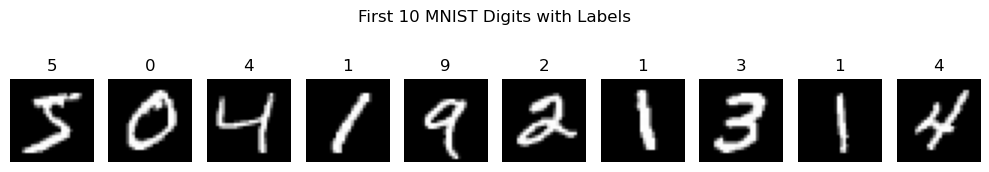

In [4]:
import matplotlib.pyplot as plt

# Plot the first 10 MNIST samples with their labels
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f"{y[i]}")
    plt.axis('off')
plt.suptitle("First 10 MNIST Digits with Labels")
plt.tight_layout()
plt.show()

In [2]:
import numpy as np

# a) Affichage du nombre de samples total
print("Nombre total d'échantillons :", X.shape[0])

Nombre total d'échantillons : 70000


In [3]:
# b) Affichage du nombre d'échantillons par classe
classes, counts = np.unique(y, return_counts=True)
for cls, count in zip(classes, counts):
    print(f"Classe {cls} : {count} échantillons")

Classe 0 : 6903 échantillons
Classe 1 : 7877 échantillons
Classe 2 : 6990 échantillons
Classe 3 : 7141 échantillons
Classe 4 : 6824 échantillons
Classe 5 : 6313 échantillons
Classe 6 : 6876 échantillons
Classe 7 : 7293 échantillons
Classe 8 : 6825 échantillons
Classe 9 : 6958 échantillons


## Data preparation and classification

As for the Iris dataset in part 1.2, you wil have to train a classification model on the MNIST dataset.  
This time, I want you to print also the execution time of your model for both training and prediction.  

**Your job:**
- Split features and targets using the holdout method.
- Select a classifier.
- Train the classifier
    - **Record the training time**
    - You can use the *time* package
        - `import time`
        - `time = time.time()`
- Evaluate the model:
    - Make prediction on the test set
    - **Record the prediction time**
    - Print the confusion matrix
    - Print the accuracy of your model

In [8]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import time

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
# Choix du classifieur
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [10]:
start_time_train = time.time()
clf.fit(X_train, y_train)
end_time_train = time.time()
training_time = end_time_train - start_time_train
print(f"Temps d'entraînement (en secondes) : {training_time:.4f}")

Temps d'entraînement (en secondes) : 167.9621


In [11]:
# Prédiction sur l’ensemble de test + temps de prédiction
start_time_pred = time.time()
y_pred = clf.predict(X_test)
end_time_pred = time.time()
prediction_time = end_time_pred - start_time_pred
print(f"Temps de prédiction (en secondes) : {prediction_time:.4f}")

Temps de prédiction (en secondes) : 1.9106


In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy:.4f}")

Accuracy : 0.9673


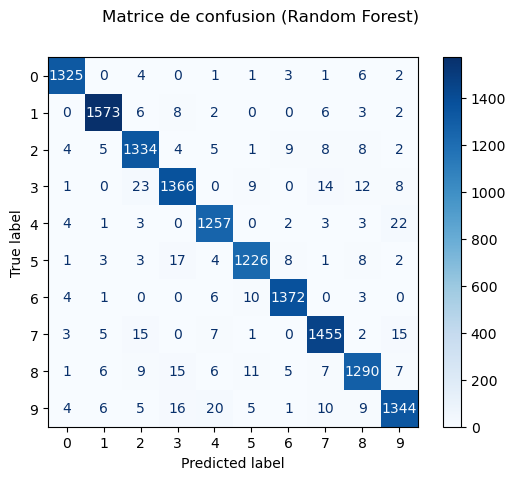

In [13]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
disp.figure_.suptitle("Matrice de confusion (Random Forest)")
plt.show()

## Dimensionality reduction


**Your job:**
- Select a dimensionality reduction algorithm
- Apply a standard scaling to the data
- Apply the algorithm on the dataset
    - Note that here were aim to improve the classification
    - *No need to force the dimension in 2D or 3D.*
- Print the new number of features.

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

print("Nombre de features d'origine :", X.shape[1])
print("Nombre de features après PCA :", X_pca.shape[1])

Nombre de features d'origine : 784
Nombre de features après PCA : 50


## Classification on reduced dataset

We now are going to evaluate the performance of your classifier on the reduced dataset.

**Your job:**
- Redo the steps to train the classifier, but with the reduced dataset
    - Train/test split
    - Classifier fitting while recording time
    - Classifier prediction while recording time
    - Compute confusion matrix and accuracy
- Conclude on the results 

In [16]:
# Séparation des données réduites
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42)

In [17]:
clf_pca = RandomForestClassifier(n_estimators=100, random_state=42)

In [18]:
start_time_train_pca = time.time()
clf_pca.fit(X_train_pca, y_train_pca)
end_time_train_pca = time.time()
training_time_pca = end_time_train_pca - start_time_train_pca
print(f"Temps d'entraînement avec PCA (en secondes) : {training_time_pca:.4f}")

Temps d'entraînement avec PCA (en secondes) : 397.7108


In [19]:
start_time_pred_pca = time.time()
y_pred_pca = clf_pca.predict(X_test_pca)
end_time_pred_pca = time.time()
prediction_time_pca = end_time_pred_pca - start_time_pred_pca
print(f"Temps de prédiction avec PCA (en secondes) : {prediction_time_pca:.4f}")

Temps de prédiction avec PCA (en secondes) : 1.2789


In [20]:
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
print(f"Accuracy avec PCA : {accuracy_pca:.4f}")

Accuracy avec PCA : 0.9450


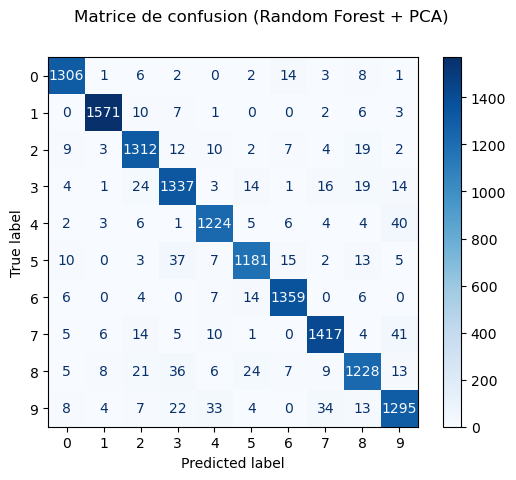

In [21]:
disp_pca = ConfusionMatrixDisplay.from_predictions(y_test_pca, y_pred_pca, cmap='Blues')
disp_pca.figure_.suptitle("Matrice de confusion (Random Forest + PCA)")
plt.show()